# Using geocoding and geometries

This sample notebook shows how geocoding and geometries can be created and used. The code below shows data to help deduce the path that the debris of a crashed airplane would take if it went down at different places in the ocean. It should be noted that this methodology is for the purpose of demonstrating GIS functionality and the results should not be treated as authoritative. Furthermore, this demo excludes wind or atmospheric conditions, which are critical for real-world analysis.

In [2]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import display

There have been speculations that the unfortunate disappearance of flight [MH370](https://en.wikipedia.org/wiki/Malaysia_Airlines_Flight_370) is tied to [Diego Garcia](https://en.wikipedia.org/wiki/Diego_Garcia), an atoll in the central Indian Ocean, in addition to other search locations in the southern Indian Ocean, west of Australia. The code below plots these locations on the map:


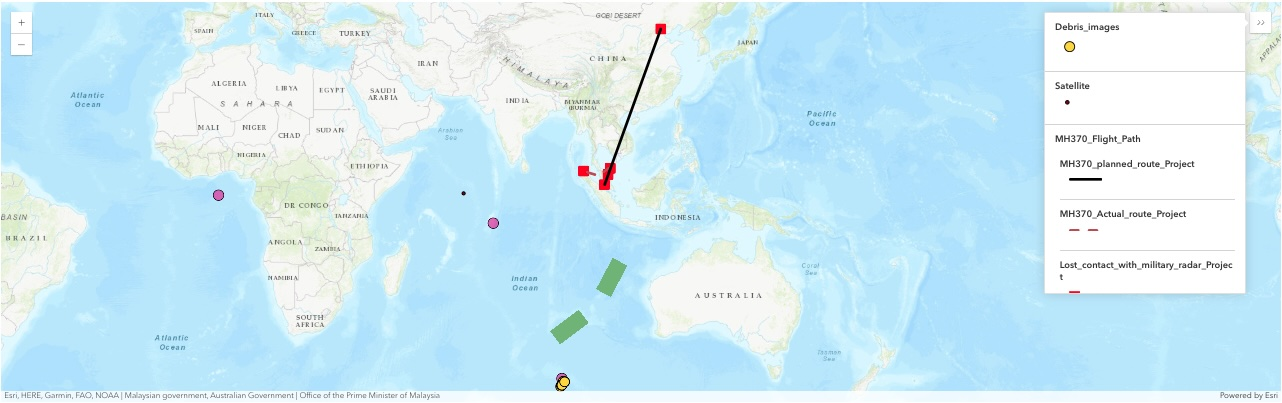

In [37]:
gis = GIS()
map1 = gis.map()
map1

In [27]:
# set the map's extent by geocoding the location
diegogarcia = geocode("Diego Garcia", out_sr=102100)[0]
diegogarcia_extent = diegogarcia['extent']
diegogarcia_extent["spatialReference"] = {"wkid": 102100}
map1.extent = diegogarcia_extent

In [28]:
# geocode location of La Reunion island
lareunion = geocode("La Reunion")[0]

In [29]:
from arcgis.map.popups import PopupInfo
popup_info1 = PopupInfo(title="La Reunion Island", description="Debris Found")
popup_info2 = PopupInfo(title="Diego Garcia", description="Naval Support Facility Diego Garcia")
popup_info3 = PopupInfo(title="Search Location", description="Predicted crash location")

In [30]:
from arcgis.layers import Service
from arcgis.geometry import Point

# Annotate the map by plotting Diego Garcia, and two other search locations
map1.content.draw(lareunion['location'], popup=popup_info1)
map1.content.draw(diegogarcia['location'], popup=popup_info2)

point = Point({"x": 90.5, "y": -43.5, "spatialReference": {"wkid": 4326}})
map1.content.draw(point, popup=popup_info3)

# Render a feature layer representing the search area
# Source: http://www.amsa.gov.au/media/incidents/images/DIGO_00718_01_14.jpg

layer = Service("http://services.arcgis.com/WQ9KVmV6xGGMnCiQ/arcgis/rest/services/MH370Search/FeatureServer/1")
map1.content.add(layer)

In [31]:
map1.zoom = 4

We can search ArcGIS Online for content related to the missing airliner, and bring in layers that we want to use for our analysis and visualization:

In [8]:
mh370items = gis.content.search("owner:bflanagan_bureau tags:mh370", "feature service", max_items=7)
for item in mh370items:
    display(item)

<Item title:"Arc" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"mh370debris" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"MH370Search" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"UnderwaterSearch" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"SatelliteLocation" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"ActualFlightRoute" type:Feature Layer Collection owner:bflanagan_bureau>

<Item title:"MH370_Flight_Path" type:Feature Layer Collection owner:bflanagan_bureau>

Let's add a few of these layers to the map for analysis.

In [32]:
# The order of items might change, change the item number according to the order of your notebook
map1.content.add(mh370items[6]) # MH370 Flight Path
map1.content.add(mh370items[4]) # SatelliteLocation
map1.content.add(mh370items[1]) # mh370debris

In [35]:
map1.zoom = 3

As we can see, we now have a map containing all of the information associated with this incident, showing the convenience of geocoding for data collection and research. From here, a user could build a custom geoprocessing tool to analyze where the debris may have ended up, based on the data available.

In [36]:
map1.legend.enabled = True